In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv(r"Mall_Customers.csv")

In [3]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### UNIVARIATE ANALYSIS

In [4]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


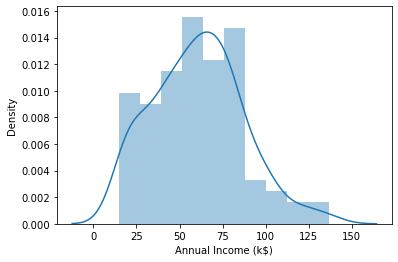

In [5]:
sns.distplot(customer_df['Annual Income (k$)'])

In [6]:
customer_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

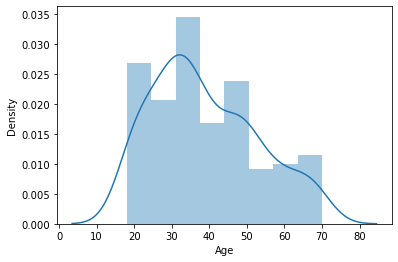

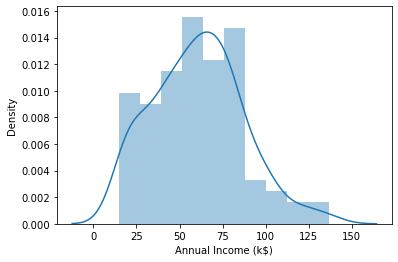

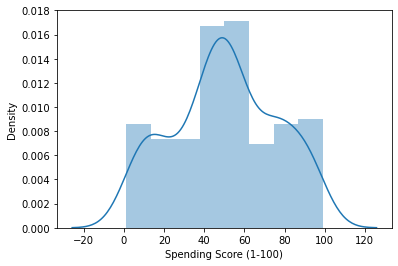

In [7]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(customer_df[i])

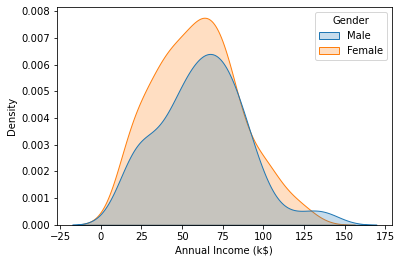

In [8]:
sns.kdeplot(customer_df['Annual Income (k$)'], shade=True, hue=customer_df['Gender'])

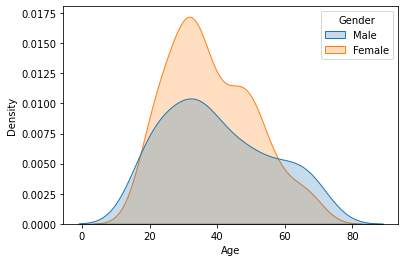

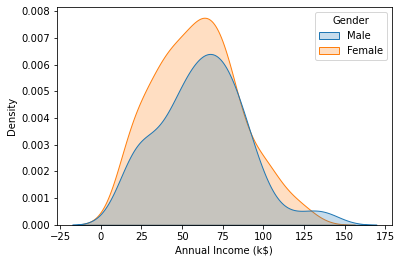

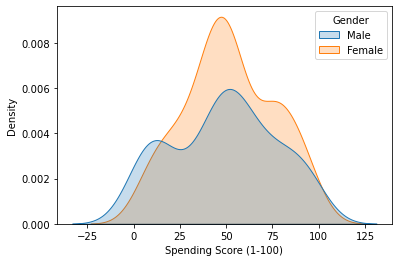

In [9]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(customer_df[i], shade= True, hue =customer_df['Gender'])

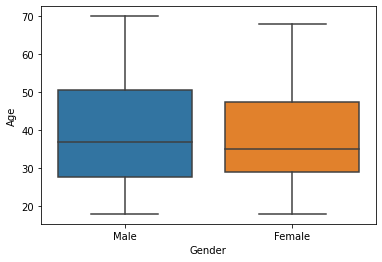

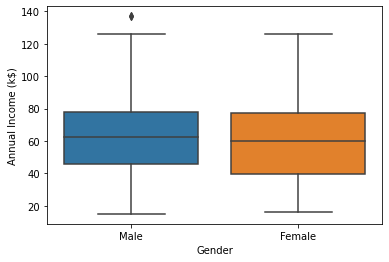

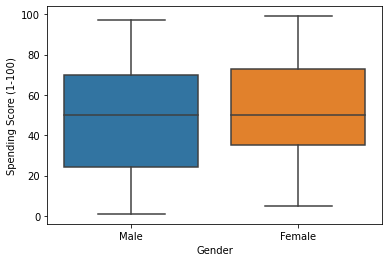

In [10]:
columns =['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = customer_df, x ='Gender', y=customer_df[i])

In [11]:
customer_df['Gender'].value_counts(normalize= True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

### BIVARIATE ANALYSIS  

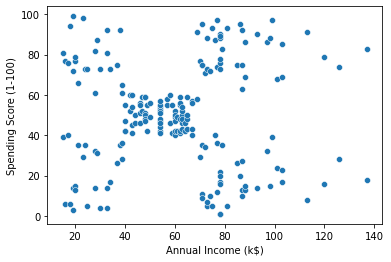

In [12]:
sns.scatterplot(data = customer_df, x = 'Annual Income (k$)', y ='Spending Score (1-100)' )

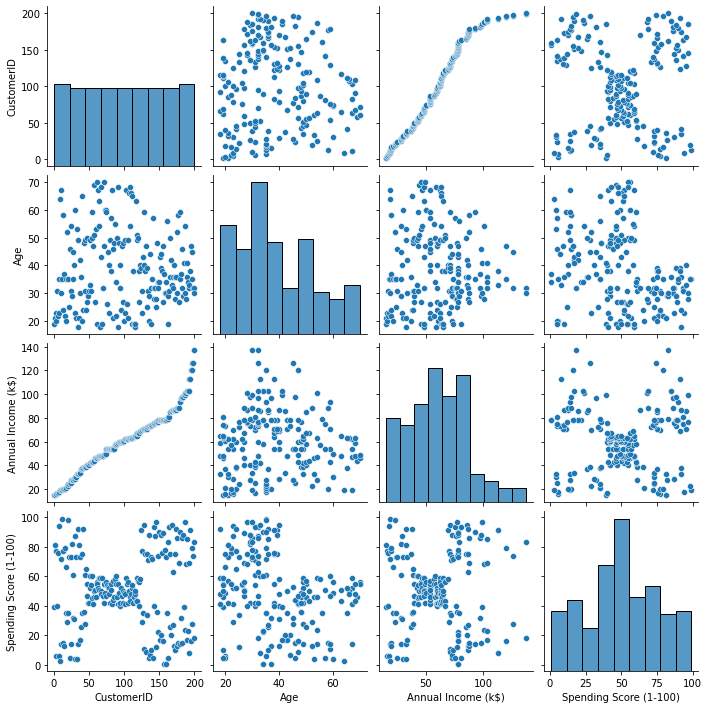

In [13]:
sns.pairplot(customer_df)

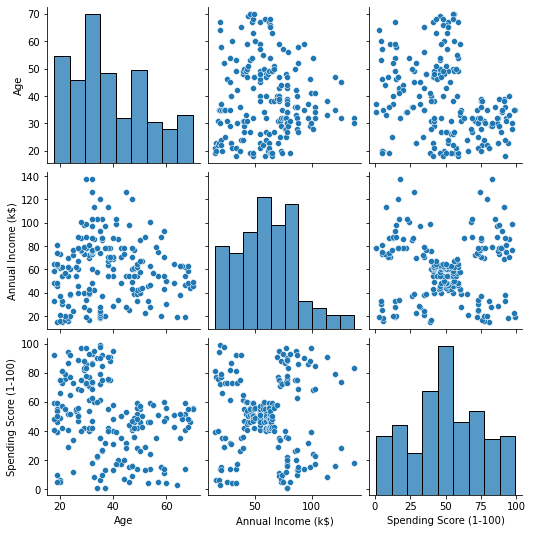

In [14]:
#Dropping customer ID 
customer_df = customer_df.drop('CustomerID', axis = 1)
sns.pairplot(customer_df)

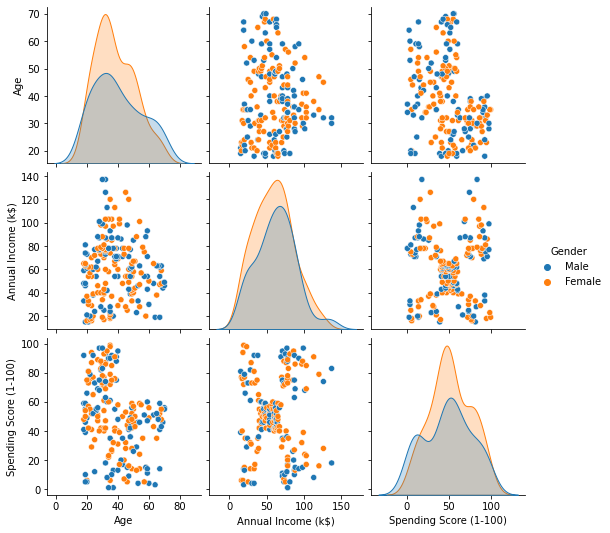

In [15]:
sns.pairplot(customer_df, hue ='Gender')

In [16]:
customer_df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
customer_df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


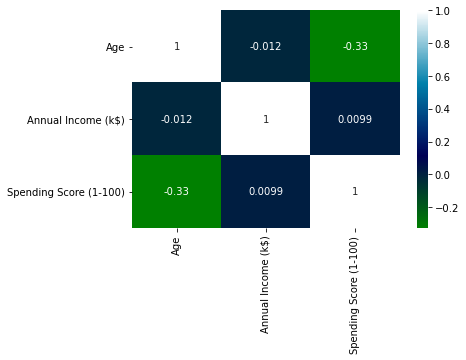

In [18]:
sns.heatmap(customer_df.corr(), annot = True, cmap="ocean" )

In [28]:
clustering1 = KMeans(n_clusters = 3)

In [29]:
clustering1.fit(customer_df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [30]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [31]:
customer_df['Income Cluster'] = clustering1.labels_
customer_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [32]:
customer_df['Income Cluster'].value_counts()

2    92
0    72
1    36
Name: Income Cluster, dtype: int64

In [33]:
clustering1.inertia_

23528.152173913044

In [34]:
inertia_scores= []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customer_df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [35]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3962.5679936006027,
 2827.308424908425,
 2192.249877899878,
 1734.167748917749]

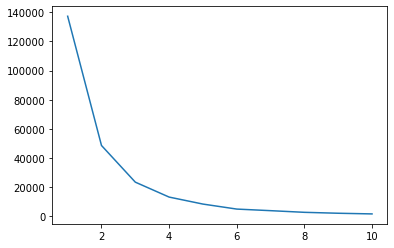

In [36]:
plt.plot(range(1,11), inertia_scores)

In [37]:
customer_df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [38]:
customer_df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,37.833333,99.888889,50.638889
2,39.184783,66.717391,50.054348


### Bivariate Clustering 

In [43]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(customer_df[['Annual Income (k$)', 'Spending Score (1-100)']])
customer_df['Spending and Income Cluster'] = clustering2.labels_
customer_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,3
2,Female,20,16,6,0,2
3,Female,23,16,77,0,3
4,Female,31,17,40,0,2


In [41]:
inertia_scores2= []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customer_df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans.inertia_)

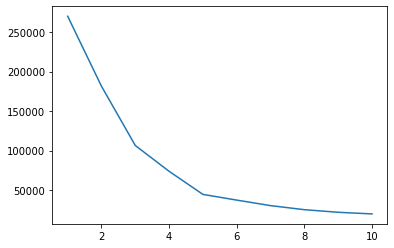

In [42]:
plt.plot(range(1,11), inertia_scores2)

In [61]:
centers =  pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['X','Y']

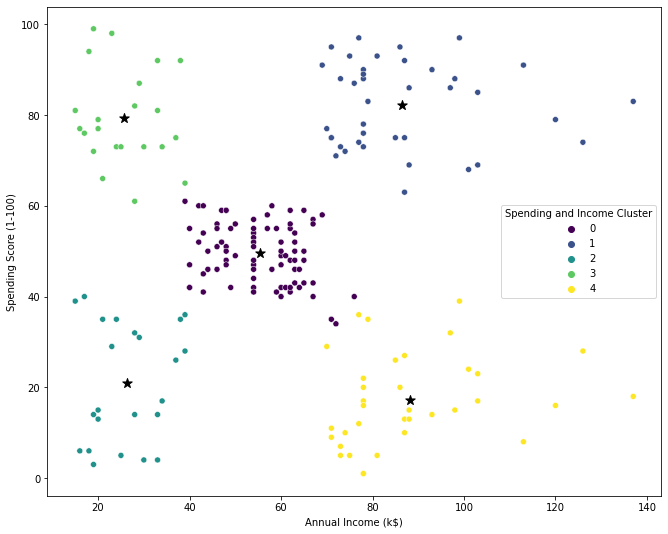

In [62]:
plt.figure(figsize=(11,9))
plt.scatter(x= centers['X'], y = centers['Y'], s= 100, c = 'Black', marker = '*' )
sns.scatterplot(data = customer_df, x = 'Annual Income (k$)',y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'viridis')

In [64]:
pd.crosstab(customer_df['Spending and Income Cluster'], customer_df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.608696,0.391304
3,0.590909,0.409091
4,0.457143,0.542857


In [65]:
customer_df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


### Multivariate Clustering

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scale = StandardScaler()

In [68]:
customer_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,3
2,Female,20,16,6,0,2
3,Female,23,16,77,0,3
4,Female,31,17,40,0,2


In [71]:
new_cust_df = pd.get_dummies(customer_df, drop_first = True)
new_cust_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,2,1
1,21,15,81,0,3,1
2,20,16,6,0,2,0
3,23,16,77,0,3,0
4,31,17,40,0,2,0


In [72]:
new_cust_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [73]:
new_cust_df= new_cust_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
new_cust_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [74]:
new_cust_df = scale.fit_transform(new_cust_df)

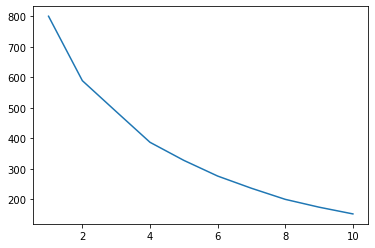

In [75]:
inertia_scores3= []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(new_cust_df)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)